##### ARIMA model

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\E\E_drive_copy\sample_data\ts_ud\Resources\Data + Code\shampoo.csv', parse_dates=[0])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [4]:
df.shape

(36, 2)

In [5]:
df

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [6]:
# P - number of terms to consider, D- number of differencing, Q - number of differencing for moving average

<AxesSubplot:xlabel='Month'>

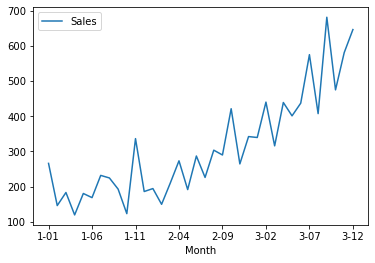

In [8]:
df.set_index('Month').plot()

In [9]:
# D = 2 (polynomial trend)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

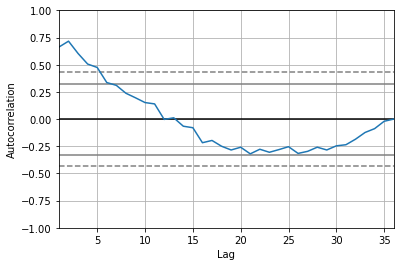

In [10]:
# autocorrelation

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

In [11]:
# q = 5 (5 continuous seasons has a correlation of 0.5 plus)

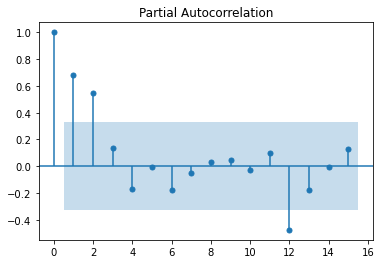

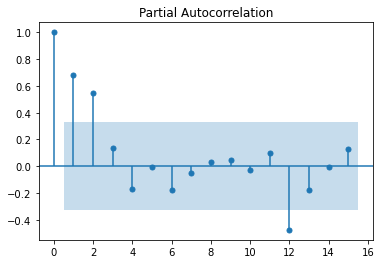

In [12]:
# partial autocorrelation

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Sales'], lags=15)

In [13]:
# p = 2 (correlation of 0.5 plus)

In [14]:
from statsmodels.tsa.arima_model import ARIMA

In [19]:
arima_model = ARIMA(df['Sales'], order=(5,2,2)).fit()

C:\Users\sreer\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\sreer\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarni

In [21]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Sales   No. Observations:                   34
Model:                 ARIMA(5, 2, 2)   Log Likelihood                -189.034
Method:                       css-mle   S.D. of innovations             54.353
Date:                Sat, 09 Apr 2022   AIC                            396.067
Time:                        11:14:21   BIC                            409.805
Sample:                             2   HQIC                           400.752
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9167      0.256      3.574      0.000       0.414       1.419
ar.L1.D2.Sales    -2.1873      0.184    -11.887      0.000      -2.548      -1.827
ar.L2.D2.Sales    -2.1232      0.405     -5.246      0.000      -2.916      -1.330
ar.L3.D2.Sales    -1.6013      0.478     -3.353      0.001      -2.537      -0.665
ar.L4.D2.Sales    -1.0317      0.409     -2.520      0.012      -1.834      -0.229
ar.L5.D2.Sales    -0.3194      0.193     -1.654      0.098      -0.698       0.059
ma.L1.D2.Sales    -0.0006      0.120     -0.005      0.996      -0.235       0.234
ma.L2.D2.Sales    -0.9994      0.119     -8.365      0.000      -1.234      -0.765
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1410           -1.3030j            1.3106           -0.2329
AR.2            0.1410           +1.3030j            1.3106            0.2329
AR.3           -1.1312           -0.4226j            1.2076           -0.4431
AR.4           -1.1312           +0.4226j            1.2076            0.4431
AR.5           -1.2499           -0.0000j            1.2499           -0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0006           +0.0000j            1.0006            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
# p value can be used to check the importance of variables

In [22]:
residuel = arima_model.resid

<AxesSubplot:>

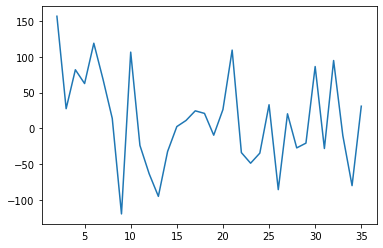

In [23]:
residuel.plot()

In [24]:
df.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [25]:
residuel.describe()

count     34.000000
mean      11.294016
std       65.989741
min     -119.294318
25%      -31.205179
50%       12.475625
75%       55.128775
max      156.383338
dtype: float64

In [26]:
# forecasting for next period

arima_model.forecast()

# the values showing are forecasted value, standard deviation, confidence intervel at 95 percentile

(array([636.09568039]),
 array([54.35276636]),
 array([[529.56621587, 742.62514491]]))

In [45]:
# forecasting next 5 values

forecast_5 = arima_model.forecast(5)

# first array contains the forecasted values

forecast_5

(array([636.09568039, 709.22300758, 664.27201687, 771.13251437,
        761.5365018 ]),
 array([54.35276636, 55.30413881, 57.46650182, 58.19318045, 60.28516131]),
 array([[529.56621587, 742.62514491],
        [600.82888731, 817.61712785],
        [551.63974299, 776.90429075],
        [657.07597654, 885.18905221],
        [643.37975683, 879.69324677]]))

In [46]:
forecast_5[0]

array([636.09568039, 709.22300758, 664.27201687, 771.13251437,
       761.5365018 ])

In [28]:
df2 = df.copy()

In [29]:
df2.head(2)

,Month,Sales
0,1-01,266.0
1,1-02,145.9


In [31]:
df2['Month'] = df2['Month'].apply(lambda x:x[2:] + '-200' + x[0])

df2.head(2)

,Month,Sales
0,01-2001,266.0
1,02-2001,145.9


In [32]:
df2['Month'] = pd.to_datetime(df2['Month'])

In [33]:
df2.head(2)

,Month,Sales
0,2001-01-01,266.0
1,2001-02-01,145.9


In [38]:
df2['Month'][-1:]

35   2003-12-01
Name: Month, dtype: datetime64[ns]

In [44]:
pd.date_range('2004-01-01', periods=5, freq='m')

DatetimeIndex(['2004-01-31', '2004-02-29', '2004-03-31', '2004-04-30',
               '2004-05-31'],
              dtype='datetime64[ns]', freq='M')

In [48]:
pred_df = pd.DataFrame({'Month':pd.date_range('2004-01-01', periods=5, freq='m'), 'Sales':[0,0,0,0,0], 'pred':forecast_5[0]})

pred_df

,Month,Sales,pred
0,2004-01-31,0,636.095680
1,2004-02-29,0,709.223008
2,2004-03-31,0,664.272017
3,2004-04-30,0,771.132514
4,2004-05-31,0,761.536502


In [49]:
df2['pred'] = 0

In [50]:
df2

,Month,Sales,pred
0,2001-01-01,266.0,0
1,2001-02-01,145.9,0
2,2001-03-01,183.1,0
3,2001-04-01,119.3,0
4,2001-05-01,180.3,0
5,2001-06-01,168.5,0
6,2001-07-01,231.8,0
7,2001-08-01,224.5,0
8,2001-09-01,192.8,0
9,2001-10-01,122.9,0


In [52]:
pred_df_final = pd.concat([df2, pred_df], ignore_index=True)

pred_df_final

,Month,Sales,pred
0,2001-01-01,266.0,0.000000
1,2001-02-01,145.9,0.000000
2,2001-03-01,183.1,0.000000
3,2001-04-01,119.3,0.000000
4,2001-05-01,180.3,0.000000
5,2001-06-01,168.5,0.000000
6,2001-07-01,231.8,0.000000
7,2001-08-01,224.5,0.000000
8,2001-09-01,192.8,0.000000
9,2001-10-01,122.9,0.000000


In [57]:
import numpy as np
pred_df_final.replace(0, np.nan, inplace=True)

pred_df_final

,Month,Sales,pred
0,2001-01-01,266.0,NaN
1,2001-02-01,145.9,NaN
2,2001-03-01,183.1,NaN
3,2001-04-01,119.3,NaN
4,2001-05-01,180.3,NaN
5,2001-06-01,168.5,NaN
6,2001-07-01,231.8,NaN
7,2001-08-01,224.5,NaN
8,2001-09-01,192.8,NaN
9,2001-10-01,122.9,NaN


<AxesSubplot:xlabel='Month'>

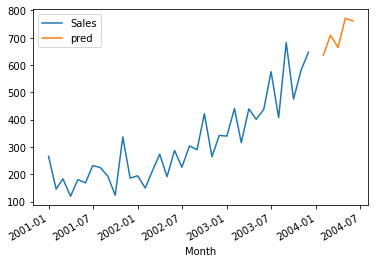

In [58]:
pred_df_final.set_index('Month').plot()